In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/Healthcare.csv


# uploading the dataset

In [4]:
health_care = pd.read_csv('/kaggle/input/healthcare-dataset/Healthcare.csv', encoding='ISO-8859-1')

health_care.head(2)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Timestamp    Age Gender Marital Status  \
0  5/14/2024 10:09:43  18-30   Male         Single   
1  5/14/2024 10:16:53  18-30   Male         Single   

  How many children do you have, if any? Employment Status  \
0                                    NaN           Student   
1                                    NaN           Student   

  Monthly Household Income Have you ever had health insurance?  \
0          Less than 10000                                 Yes   
1              10001-20000                                  No   

  If yes, which insurance cover?  \
0                Amaco insurance   
1                            NaN   

  When was the last time you visited a hospital for medical treatment? (In Months)  \
0                                               2022                                 
1                                          10 months                                 

  Did you have health insurance during your last hospital visit?  \
0                                                 No               
1                                                 No               

  Have you ever had a routine check-up with a doctor or healthcare provider?  \
0                                                 No                           
1                                                 No                           

  If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?  \
0                                                NaN                                                                           
1                                                NaN                                                                           

  Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?  \
0                                                 No                          
1                                                 No                          

  If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?  \
0                                                NaN                                                                           
1                                                NaN                                                                           

                 GeoCode                                         GeoAddress  \
0  -1.2852333,36.8556432  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...   
1   -0.7274496,37.158912                          75F5+5GC, Murang'a, Kenya   

   Unnamed: 17  Unnamed: 18  Unnamed: 19  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN

# Renaming columns

In [6]:
#Renaming columns for easy reading
health_care.columns = ['Timestamp','Age','Gender','Marital_status','no_children','Employment','monthly_income',
                       'Insurance','insurance_type','last_visit (months)','insurance_lastvisit','checkup',
                       'last_checkup (years)','cancer_screening','last_screening (years)','geocode','geoaddress',
                      'blank','blank','blank']

In [7]:
health_care.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Timestamp    Age Gender Marital_status no_children  Employment  \
0  5/14/2024 10:09:43  18-30   Male         Single         NaN     Student   
1  5/14/2024 10:16:53  18-30   Male         Single         NaN     Student   
2  5/14/2024 10:21:34  18-30   Male         Single         NaN  Unemployed   
3  5/14/2024 10:27:40  18-30   Male         Single         NaN  Unemployed   
4  5/14/2024 10:34:20  18-30   Male         Single           0     Student   

    monthly_income Insurance   insurance_type last_visit (months)  \
0  Less than 10000       Yes  Amaco insurance                2022   
1      10001-20000        No              NaN           10 months   
2  Less than 10000        No              NaN              Apr-24   
3  Less than 10000        No              NaN                  11   
4  Less than 10000        No              NaN                  12   

  insurance_lastvisit checkup last_checkup (years) cancer_screening  \
0                  No      No                  NaN               No   
1                  No      No                  NaN               No   
2                  No      No                  NaN               No   
3                  No      No                  NaN               No   
4                  No      No                  NaN               No   

  last_screening (years)                geocode  \
0                    NaN  -1.2852333,36.8556432   
1                    NaN   -0.7274496,37.158912   
2                    NaN  -0.7284222,37.1501468   
3                    NaN  -1.2852333,36.8556432   
4                    NaN        -1.2841,36.8155   

                                          geoaddress  blank  blank  blank  
0  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...    NaN    NaN    NaN  
1                          75F5+5GC, Murang'a, Kenya    NaN    NaN    NaN  
2                                         C71, Kenya    NaN    NaN    NaN  
3  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...    NaN    NaN    NaN  
4          Kenyatta Market, PR88+959, Nairobi, Kenya    NaN    NaN    NaN

# Cleaning the dataset

In [8]:
#drop the columns that contain null values
health_care = health_care.dropna(axis=1,how='all')
#drop columns that are not important in our analysis
health_care1 = health_care.drop(columns=['geocode','geoaddress','Timestamp'])
health_care.head()

Timestamp    Age Gender Marital_status no_children  Employment  \
0  5/14/2024 10:09:43  18-30   Male         Single         NaN     Student   
1  5/14/2024 10:16:53  18-30   Male         Single         NaN     Student   
2  5/14/2024 10:21:34  18-30   Male         Single         NaN  Unemployed   
3  5/14/2024 10:27:40  18-30   Male         Single         NaN  Unemployed   
4  5/14/2024 10:34:20  18-30   Male         Single           0     Student   

    monthly_income Insurance   insurance_type last_visit (months)  \
0  Less than 10000       Yes  Amaco insurance                2022   
1      10001-20000        No              NaN           10 months   
2  Less than 10000        No              NaN              Apr-24   
3  Less than 10000        No              NaN                  11   
4  Less than 10000        No              NaN                  12   

  insurance_lastvisit checkup last_checkup (years) cancer_screening  \
0                  No      No                  NaN               No   
1                  No      No                  NaN               No   
2                  No      No                  NaN               No   
3                  No      No                  NaN               No   
4                  No      No                  NaN               No   

  last_screening (years)                geocode  \
0                    NaN  -1.2852333,36.8556432   
1                    NaN   -0.7274496,37.158912   
2                    NaN  -0.7284222,37.1501468   
3                    NaN  -1.2852333,36.8556432   
4                    NaN        -1.2841,36.8155   

                                          geoaddress  
0  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...  
1                          75F5+5GC, Murang'a, Kenya  
2                                         C71, Kenya  
3  Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...  
4          Kenyatta Market, PR88+959, Nairobi, Kenya

In [9]:
health_care1.isna().sum()

Age                        126
Gender                     116
Marital_status             116
no_children               1269
Employment                 143
monthly_income             351
Insurance                  123
insurance_type            3078
last_visit (months)        360
insurance_lastvisit        236
checkup                    160
last_checkup (years)      4330
cancer_screening           150
last_screening (years)    4883
dtype: int64

In [10]:
#drop rows that have more than 5 empty cells 
health_care1 = health_care1[health_care1.isnull().sum(axis=1) <= 5]
health_care1 = health_care1.dropna(subset=['Age', 'Gender', 'Marital_status','Employment',
                                          'Insurance','checkup','cancer_screening','last_checkup (years)',
                                          'last_screening (years)','monthly_income','last_visit (months)'])
health_care1.isna().sum()


Age                         0
Gender                      0
Marital_status              0
no_children                63
Employment                  0
monthly_income              0
Insurance                   0
insurance_type            158
last_visit (months)         0
insurance_lastvisit         6
checkup                     0
last_checkup (years)        0
cancer_screening            0
last_screening (years)      0
dtype: int64

In [11]:
# Fill the null values in the children column with 0
health_care1['no_children'] = health_care1['no_children'].fillna(0)

# Fill the null values in insurance_type and insurance_lastvisit with 'Unknown'
health_care1['insurance_type'] = health_care1['insurance_type'].fillna('Unknown')
health_care1['insurance_lastvisit'] = health_care1['insurance_lastvisit'].fillna('Unknown')

# Check remaining missing values
health_care1.isna().sum()


Age                       0
Gender                    0
Marital_status            0
no_children               0
Employment                0
monthly_income            0
Insurance                 0
insurance_type            0
last_visit (months)       0
insurance_lastvisit       0
checkup                   0
last_checkup (years)      0
cancer_screening          0
last_screening (years)    0
dtype: int64

In [71]:
health_care1.drop_duplicates(inplace=True)

In [12]:
health_care1.info()
health_care1.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1060 entries, 43 to 6283
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1060 non-null   object
 1   Gender                  1060 non-null   object
 2   Marital_status          1060 non-null   object
 3   no_children             1060 non-null   object
 4   Employment              1060 non-null   object
 5   monthly_income          1060 non-null   object
 6   Insurance               1060 non-null   object
 7   insurance_type          1060 non-null   object
 8   last_visit (months)     1060 non-null   object
 9   insurance_lastvisit     1060 non-null   object
 10  checkup                 1060 non-null   object
 11  last_checkup (years)    1060 non-null   object
 12  cancer_screening        1060 non-null   object
 13  last_screening (years)  1060 non-null   object
dtypes: object(14)
memory usage: 124.2+ KB


Age  Gender Marital_status no_children Employment monthly_income  \
count    1060    1060           1060        1060       1060           1060   
unique     12       2              4          44          4              6   
top     31-40  Female        Married           2   Employed         50001+   
freq      252     613            616         186        462            240   

       Insurance insurance_type last_visit (months) insurance_lastvisit  \
count       1060           1060                1060                1060   
unique         2            161                 185                   3   
top          Yes           NHIF                   1                 Yes   
freq         807            313                 130                 728   

       checkup last_checkup (years) cancer_screening last_screening (years)  
count     1060                 1060             1060                   1060  
unique       2                    4                2                      4  
top        Yes                    1              Yes                      1  
freq       991                  572              974                    428

# Statistics

In [75]:
#visit frequency by insurance type
health_care1['insurance_type'].value_counts()

insurance_type
NHIF                      309
Unknown                   156
Null                       72
Nhif                       62
Britam                     53
                         ... 
Mtiba                       1
Afyaimara health cover      1
Death and accident          1
Family insurance cover      1
APA insurance cover         1
Name: count, Length: 161, dtype: int64

people using NHIF insurance visit the hospital frequently and use their insurance cover

In [79]:
#Does one monthly income affect whether they have insurance
pd.crosstab(health_care1['monthly_income'], health_care1['Insurance'])


Insurance        No  Yes
monthly_income          
10001-20000      47   91
20001-30000      61  115
30001-40000      21  136
40001-50000      20  140
50001+           21  219
Less than 10000  78  102

The higher the income the higher the number of people having insurance

In [80]:
pd.crosstab(health_care1['monthly_income'], health_care1['cancer_screening'])


cancer_screening  No  Yes
monthly_income           
10001-20000       24  114
20001-30000        6  170
30001-40000        6  151
40001-50000        7  153
50001+             7  233
Less than 10000   33  147

people with higher income are more likely to go for cancer screening

In [81]:
pd.crosstab(health_care1['Gender'], health_care1['Insurance'])

Insurance   No  Yes
Gender             
Female     150  458
Male        98  345

More women have insurance compared to men

In [84]:
pd.crosstab(health_care1['Employment'], health_care1['checkup'])

checkup        No  Yes
Employment            
Employed       15  447
Self-employed  24  347
Student        15   58
Unemployed     13  132

More employed people go for checkups compared to those that are unemployed and students 

# Data visualization

Visualizing which gender goes for more checkups

<Axes: xlabel='Gender', ylabel='count'>

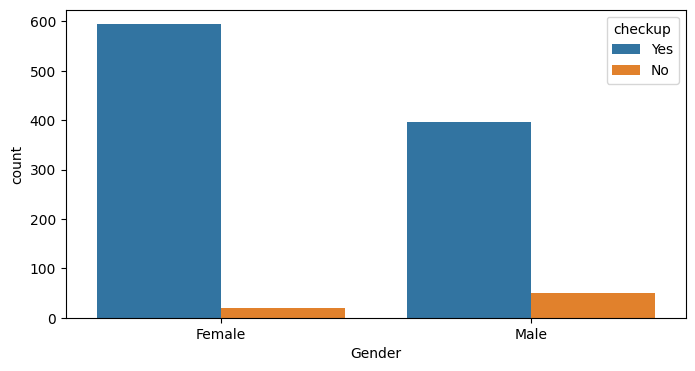

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x='Gender', hue='checkup', data=health_care1)


<Axes: title={'center': 'Bar chart showing monthly income  counts'}, xlabel='monthly_income', ylabel='count'>

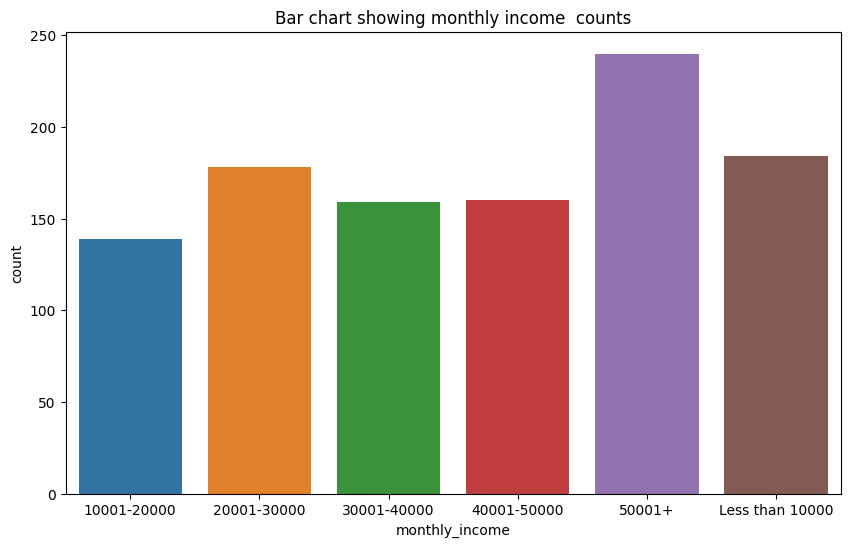

In [20]:
plt.figure(figsize=(10,6))
plt.title('Bar chart showing monthly income  counts')
sns.countplot(x='monthly_income', data=health_care1, order=sorted(health_care1['monthly_income'].unique()))

Visualizing what percentage of the population has insurance

Text(0, 0.5, '')

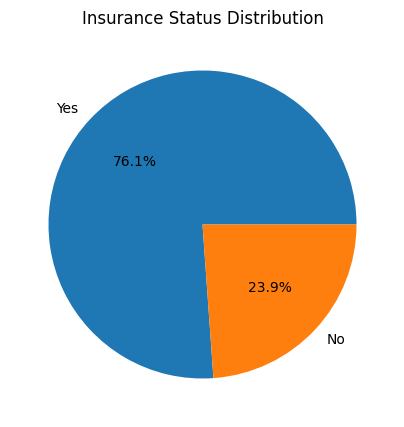

In [27]:
health_care1['Insurance'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title('Insurance Status Distribution')
plt.ylabel('')  

Percentages of persons having insurance according to age ranges

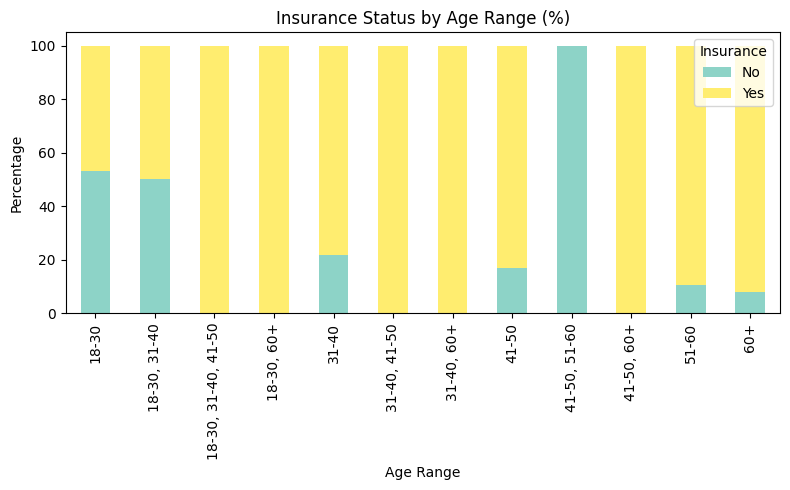

In [30]:
age_insurance = pd.crosstab(health_care1['Age'], health_care1['Insurance'], normalize='index') * 100

# Plot stacked bar chart
age_insurance.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set3')
plt.title('Insurance Status by Age Range (%)')
plt.ylabel('Percentage')
plt.xlabel('Age Range')
plt.legend(title='Insurance')
plt.tight_layout()
plt.show()